In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [2]:
filepath = 'https://raw.githubusercontent.com/MrHexeberg/AI-medical-project/refs/heads/main/Tablet%20examination%20-%20Munka1.csv'

data = pd.read_csv(filepath, skiprows = 1)
data = data.drop('Measurement', axis = 1)

data.head()

,Press Force (kg),Motor Speed (tablets/min),Particle Size (μm),Tablet Hardness (N),Tablet Height (mm),Tablet Friability (%)
0,732,146,157,81.9,5.23,0.318
1,851,110,180,91.0,4.82,0.200
2,562,197,133,59.6,5.79,0.466
3,923,122,189,96.3,4.66,0.181
4,688,154,112,74.0,5.37,0.332


In [3]:
X = data[['Press Force (kg)', 'Motor Speed (tablets/min)', 'Particle Size (μm)']]
y = data[['Tablet Hardness (N)', 'Tablet Height (mm)', 'Tablet Friability (%)']]

In [4]:
# Splitting the dataset into training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Scaling the dataset
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)



In [6]:

model = MultiOutputRegressor(LinearRegression())
model.fit(X_poly, y)

MultiOutputRegressor(estimator=LinearRegression())

In [7]:
# Assuming X_test is your test features
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)
# y_pred = model.predict(poly.transform(X_test))

In [8]:
print("y_test type:", type(y_test))
print("y_pred type:", type(y_pred))
print("y_test shape:", y_test.shape if hasattr(y_test, 'shape') else len(y_test))
print("y_pred shape:", y_pred.shape if hasattr(y_pred, 'shape') else len(y_pred))

y_test type: <class 'pandas.core.frame.DataFrame'>
y_pred type: <class 'numpy.ndarray'>
y_test shape: (20, 3)
y_pred shape: (20, 3)


In [9]:
column_names = y_test.columns

for i, col in enumerate(column_names):
    print(f"Output {i+1} ({col}):")
    
    y_test_col = y_test[col].values  
    y_pred_col = y_pred[:, i]
    
    r2 = r2_score(y_test_col, y_pred_col)
    print(f"R2 Score: {r2:.3f}")
    
    rmse = np.sqrt(mean_squared_error(y_test_col, y_pred_col))
    print(f"RMSE: {rmse:.3f}")
    
    print()  

Output 1 (Tablet Hardness (N)):
R2 Score: 0.996
RMSE: 0.882

Output 2 (Tablet Height (mm)):
R2 Score: 0.996
RMSE: 0.029

Output 3 (Tablet Friability (%)):
R2 Score: 0.996
RMSE: 0.006



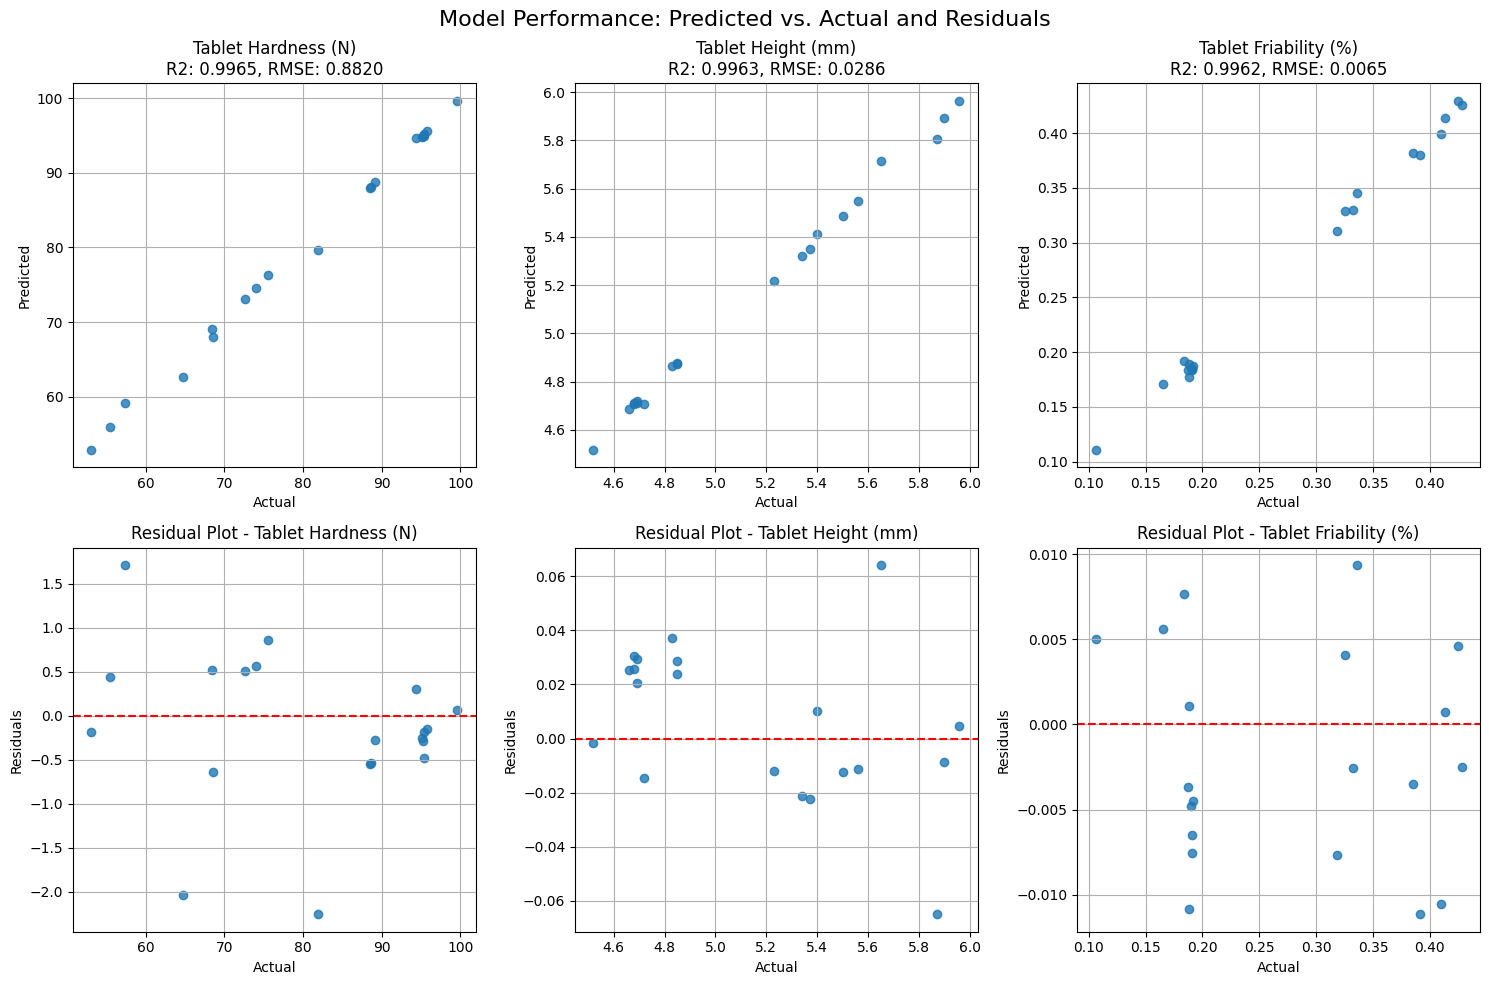

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

# Assuming y_test is a DataFrame and y_pred is a numpy array, both with shape (20, 3)

def plot_results(y_test, y_pred):
    column_names = y_test.columns
    n_outputs = len(column_names)
    
    # Create a figure with subplots
    fig, axes = plt.subplots(2, n_outputs, figsize=(5*n_outputs, 10))
    fig.suptitle('Model Performance: Predicted vs. Actual and Residuals', fontsize=16)

    for i, col in enumerate(column_names):
        y_test_col = y_test[col].values
        y_pred_col = y_pred[:, i]
        
        # Calculate metrics
        r2 = r2_score(y_test_col, y_pred_col)
        rmse = np.sqrt(mean_squared_error(y_test_col, y_pred_col))
        
        # Scatter plot
        axes[0, i].scatter(y_test_col, y_pred_col, alpha=0.8)
        # axes[0, i].plot([y_test_col.min(), y_test_col.max()], [y_test_col.min(), y_test_col.max()], 'r--', lw=2)
        axes[0, i].set_xlabel('Actual')
        axes[0, i].set_ylabel('Predicted')
        axes[0, i].set_title(f'{col}\nR2: {r2:.4f}, RMSE: {rmse:.4f}')
        axes[0, i].grid()
        
        # Residual plot
        residuals = y_pred_col - y_test_col
        axes[1, i].scatter(y_test_col, residuals, alpha=0.8)
        axes[1, i].axhline(y=0, color='r', linestyle='--')
        axes[1, i].set_xlabel('Actual')
        axes[1, i].set_ylabel('Residuals')
        axes[1, i].set_title(f'Residual Plot - {col}')
        axes[1, i].grid()

    plt.tight_layout()
    plt.show()

# Call the function
plot_results(y_test, y_pred)